In [1]:
import warnings

warnings.filterwarnings( 'ignore' )

In [2]:
import pandas as pd

rating_df = pd.read_csv('C:\\content_caching\\ml-25m\\ratings.csv')
rating_df

,userId,movieId,rating,timestamp
0,1,296,5.0,1147880044
1,1,306,3.5,1147868817
2,1,307,5.0,1147868828
3,1,665,5.0,1147878820
4,1,899,3.5,1147868510
...,...,...,...,...
25000090,162541,50872,4.5,1240953372
25000091,162541,55768,2.5,1240951998
25000092,162541,56176,2.0,1240950697
25000093,162541,58559,4.0,1240953434


In [3]:
import time
import datetime

print('min timestamp: ',rating_df['timestamp'].min(), str(datetime.datetime.fromtimestamp(rating_df['timestamp'].min())))
print('max timestamp: ',rating_df['timestamp'].max(), str(datetime.datetime.fromtimestamp(rating_df['timestamp'].max())))

min timestamp:  789652009 1995-01-09 20:46:49
max timestamp:  1574327703 2019-11-21 18:15:03


In [4]:
standard_year = '2019'
standard_time = standard_year+'-01-01 00:00:00' # 2019년 데이터만 사용
standard_time = datetime.datetime.strptime(standard_time, '%Y-%m-%d %H:%M:%S')
standard_timestamp = int(time.mktime(standard_time.timetuple()))
print('test timestamp: ', standard_timestamp)
print('test time: ',str(datetime.datetime.fromtimestamp(standard_timestamp)))

test timestamp:  1546268400
test time:  2019-01-01 00:00:00


In [5]:
after2019_rating_df = rating_df[rating_df['timestamp'] >= standard_timestamp].reset_index(drop=True)
after2019_rating_df

,userId,movieId,rating,timestamp
0,3,1274,4.5,1566088819
1,3,1732,4.5,1566091883
2,3,1960,4.0,1566090766
3,3,2021,4.0,1566089449
4,3,3408,3.5,1566089773
...,...,...,...,...
1202597,162536,148626,5.0,1572259347
1202598,162536,148685,5.0,1572257813
1202599,162536,164179,4.0,1572259078
1202600,162536,202429,4.0,1572257782


In [6]:
print('number of  movieIds : ', after2019_rating_df['movieId'].nunique())
print('number of  userId : ', after2019_rating_df['userId'].nunique())

number of  movieIds :  41440
number of  userId :  10619


In [7]:
standards = {'January':['2019-01-01 00:00:00', '2019-02-01 00:00:00'],
             'February':['2019-02-01 00:00:00', '2019-03-01 00:00:00'],
             'March':['2019-03-01 00:00:00', '2019-04-01 00:00:00'],
             'April':['2019-04-01 00:00:00', '2019-05-01 00:00:00'],
             'May':['2019-05-01 00:00:00', '2019-06-01 00:00:00'],
             'June':['2019-06-01 00:00:00', '2019-07-01 00:00:00'],
             'July':['2019-07-01 00:00:00', '2019-08-01 00:00:00'],
             'August':['2019-08-01 00:00:00', '2019-09-01 00:00:00'],
             'September':['2019-09-01 00:00:00', '2019-10-01 00:00:00'],
             'October':['2019-10-01 00:00:00', '2019-11-01 00:00:00'],
             'November':['2019-11-01 00:00:00', '2019-12-01 00:00:00'],
             'December':['2019-12-01 00:00:00', '2020-01-01 00:00:00']
             }

Month = list(standards.keys())[11-1] # 4월 -1 index
print(Month)

start_time = datetime.datetime.strptime(standards[Month][0], '%Y-%m-%d %H:%M:%S')
end_time = datetime.datetime.strptime(standards[Month][1], '%Y-%m-%d %H:%M:%S')

start_timestamp = int(time.mktime(start_time.timetuple()))
end_timestamp = int(time.mktime(end_time.timetuple()))

print(start_time, start_timestamp)
print(end_time, end_timestamp)

month_rating_df = after2019_rating_df[(after2019_rating_df['timestamp'] < end_timestamp) &
                                   (after2019_rating_df['timestamp'] >= start_timestamp)].reset_index(drop=True)

# 10월까지 1,216 개 생성. 
# 11월까지 1,300 개 생성. 
if Month == 'November': # 12월 데이터는 존재하지 않음. 11월 존재하는 데이터까지만 진행.
    end_timestamp = month_rating_df['timestamp'].max()
    
month_rating_df

November
2019-11-01 00:00:00 1572534000
2019-12-01 00:00:00 1575126000


,userId,movieId,rating,timestamp
0,4,1,3.0,1573944252
1,4,260,3.5,1573938415
2,4,296,4.0,1573938898
3,4,541,4.5,1573944303
4,4,589,4.0,1573939042
...,...,...,...,...
67396,162190,204698,1.5,1573824042
67397,162257,204698,3.0,1573410931
67398,162305,204692,1.5,1573107264
67399,162516,179749,3.0,1572577455


In [8]:
print('number of  movieIds : ', month_rating_df['movieId'].nunique())
print('number of  userId : ', month_rating_df['userId'].nunique())

number of  movieIds :  10881
number of  userId :  2018


In [9]:
month_rating_df['movieId'].value_counts()

204698    283
58559     209
122914    209
2959      204
79132     204
         ... 
57865       1
57513       1
56051       1
55826       1
179889      1
Name: movieId, Length: 10881, dtype: int64

In [10]:
import pandas as pd

# Assuming your DataFrame is named month_rating_df

# Count the frequency of each movieId
movie_frequency = month_rating_df['movieId'].value_counts()

# Create a dictionary to map original movieIds to their corresponding frequencies
movie_frequency_map = movie_frequency.to_dict()

# Sort the dictionary by frequency and assign new movieId values starting from 0
sorted_movie_ids = sorted(movie_frequency_map, key=lambda x: movie_frequency_map[x], reverse=True)
remapped_ids = {movie_id: idx for idx, movie_id in enumerate(sorted_movie_ids)}

# Apply the remapping to the DataFrame
month_rating_df['remapped_movieId'] = month_rating_df['movieId'].map(remapped_ids)

# Now month_rating_df contains a new column 'remapped_movieId' with the remapped values
month_rating_df

,userId,movieId,rating,timestamp,remapped_movieId
0,4,1,3.0,1573944252,75
1,4,260,3.5,1573938415,9
2,4,296,4.0,1573938898,13
3,4,541,4.5,1573944303,86
4,4,589,4.0,1573939042,89
...,...,...,...,...,...
67396,162190,204698,1.5,1573824042,0
67397,162257,204698,3.0,1573410931,0
67398,162305,204692,1.5,1573107264,1024
67399,162516,179749,3.0,1572577455,2174


In [11]:
month_rating_df['remapped_movieId'].value_counts()

0        283
1        209
2        209
3        204
4        204
        ... 
10876      1
10877      1
10878      1
10879      1
10880      1
Name: remapped_movieId, Length: 10881, dtype: int64

In [12]:
movie_id_probabilites = month_rating_df['remapped_movieId'].value_counts() / month_rating_df['remapped_movieId'].value_counts().sum()
movie_id_probabilites

0        0.004199
1        0.003101
2        0.003101
3        0.003027
4        0.003027
           ...   
10876    0.000015
10877    0.000015
10878    0.000015
10879    0.000015
10880    0.000015
Name: remapped_movieId, Length: 10881, dtype: float64

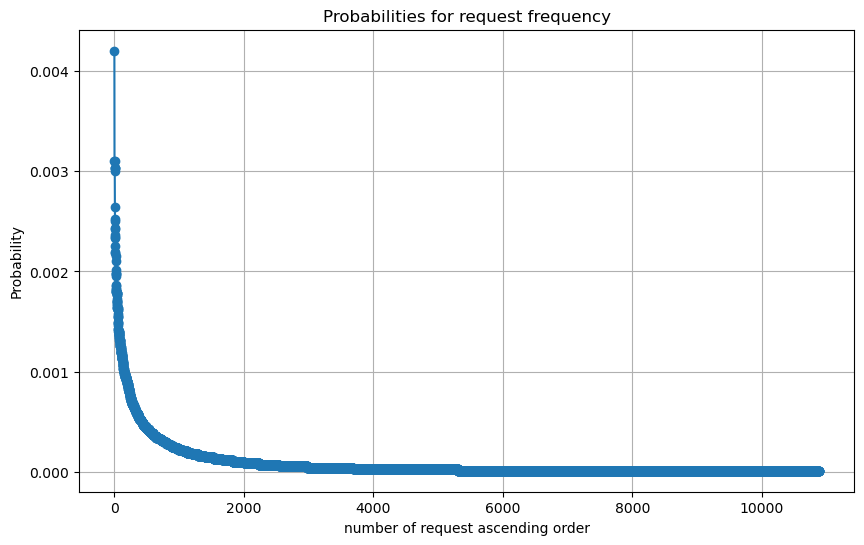

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Visualize the probabilities for the first row
plt.figure(figsize=(10, 6))
plt.plot(range(len(movie_id_probabilites.values)), movie_id_probabilites.values, marker='o')
plt.xlabel('number of request ascending order')
plt.ylabel('Probability')
plt.title('Probabilities for request frequency')
plt.grid(True)
plt.show()

In [14]:
movie_id_probabilites.sum()

1.0

In [15]:
pareto = int(month_rating_df['movieId'].nunique() * 0.2)
print('top 20% 개수 : ', pareto)

pareto_probability = sum(movie_id_probabilites.values[:pareto+1])
print('top 20% 비율 : ', pareto_probability)

top 20% 개수 :  2176
top 20% 비율 :  0.7836678981024137


In [16]:
number_of_service_Ids = 64

Y = 0.2

pareto_number_of_service_ids = int(number_of_service_Ids * Y)

pareto_number_of_movies_per_service = int(pareto / pareto_number_of_service_ids) + 1
print('pareto : ',pareto_number_of_service_ids, pareto_number_of_movies_per_service)

not_pareto_number_of_service_ids = number_of_service_Ids - pareto_number_of_service_ids
try:
    not_pareto_number_of_movies_per_service = int((month_rating_df['movieId'].nunique()-pareto) / not_pareto_number_of_service_ids) + 1
except:
    not_pareto_number_of_movies_per_service = 0
print('rest pareto : ', not_pareto_number_of_service_ids, not_pareto_number_of_movies_per_service)

pareto :  12 182
rest pareto :  52 168


In [17]:
# Create a mapping dictionary for remapped_movieId to service_id
mapping_dict = {}

pareto = pareto_number_of_service_ids * pareto_number_of_movies_per_service

# Map the remapped_movieId values to service_id values
current_service_id = 0
for value in range(pareto):
    if value % pareto_number_of_movies_per_service == 0 and value != 0:
        current_service_id += 1
    mapping_dict[value] = current_service_id

for value in range(pareto, month_rating_df['movieId'].nunique()):
    tmp_value = value-pareto
    try:
        if tmp_value % not_pareto_number_of_movies_per_service == 0:
            current_service_id += 1
        mapping_dict[value] = current_service_id
    except:
        break

# 실험단계
매 time slot 시작될 때 마다
+ user x_position, y_position 바꾸기
1. movie  묶음  ID와  각 mec별  service Id mapping을  random하게 변경
2. 무비랜즈 파일에서 t-1 시점 마지막 movie를 선택한 user id가 u라면 t시점 첫번째 movie를 선택한 user id는 (u+1)%user수
3. 선택한무비가위에서나눈128개의서비스ID중어디에속하는지판단하여해당서비스ID의요청횟수1증가시킴
4. 이와같은방법으로timeslott동안서비스ID별요청횟수를얻음

In [18]:
import random

# Set the seed value
random.seed(42)

# Example usage
number_of_sample_users = 1000
number_of_mecs = 9  # Number of sqrt MECs
mecs = [(x, y) for x in range(int(number_of_mecs**(1/2))) for y in range(int(number_of_mecs**(1/2)))]

print(mecs)

max_speed = 0.2
correlation_time = 0.5

# Number of move
num_steps = 1

now_positions = [(round(random.uniform(0, int(number_of_mecs**(1/2))-1), 13), round(random.uniform(0, int(number_of_mecs**(1/2))-1), 13)) for _ in range(number_of_sample_users)]
print('min,  max : ', 0, int(number_of_mecs**(1/2))-1)
print('now_positions[1] : ', now_positions[10])

[(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
min,  max :  0 2
now_positions[1] :  (1.6116385036656, 1.3962787899765)


In [19]:
import random

random.seed(42)

# Step 1: Create empty groups
groups = [[] for _ in range(64)]

# Step 2: Populate groups based on values
for key, value in mapping_dict.items():
    groups[value].append((key))

service_id_per_mec = []
for mec in range(number_of_mecs):
    random.shuffle(groups)

    mapping_dict = {}
    for service_id, keys in enumerate(groups):
        for key in keys:
            mapping_dict[key] = service_id

    service_id_per_mec.append(mapping_dict)

len(service_id_per_mec)

9

In [20]:
for idx in range(len(service_id_per_mec)):
    count = 0

    for value in service_id_per_mec[idx].values():
        if value == 0:
            count+=1

    print(idx, count)

0 168
1 182
2 168
3 182
4 168
5 182
6 168
7 182
8 168


In [21]:
data = {
    'userId' : range(number_of_sample_users),
    'x_position' : [now_position[0] for now_position in now_positions],
    'y_position' : [now_position[1] for now_position in now_positions]
}

user_df = pd.DataFrame(data)
user_df

,userId,x_position,y_position
0,0,1.278854,0.050022
1,1,0.550059,0.446421
2,2,1.472942,1.353399
3,3,1.784359,0.173878
4,4,0.843844,0.059594
...,...,...,...
995,995,0.112888,1.007792
996,996,0.578527,1.631573
997,997,1.463035,0.637807
998,998,1.195835,1.345064


In [22]:
import numpy as np

mecs_array = np.array(mecs)

def calculate_nearest_mec(group):
    distances = np.sqrt((group['x_position'].values[:, np.newaxis] - mecs_array[:, 0])**2 + (group['y_position'].values[:, np.newaxis] - mecs_array[:, 1])**2)
    nearest_mec_index = np.argmin(distances)
    group['nearest_mec'] = nearest_mec_index
    return group

user_df = user_df.groupby('userId').apply(calculate_nearest_mec)
user_df

,userId,x_position,y_position,nearest_mec
0,0,1.278854,0.050022,3
1,1,0.550059,0.446421,3
2,2,1.472942,1.353399,4
3,3,1.784359,0.173878,6
4,4,0.843844,0.059594,3
...,...,...,...,...
995,995,0.112888,1.007792,1
996,996,0.578527,1.631573,5
997,997,1.463035,0.637807,4
998,998,1.195835,1.345064,4


In [23]:
user_df['positions'] = list(zip(user_df['x_position'], user_df['y_position']))
user_df

,userId,x_position,y_position,nearest_mec,positions
0,0,1.278854,0.050022,3,"(1.2788535969158, 0.0500215104453)"
1,1,0.550059,0.446421,3,"(0.5500586367382, 0.4464214762976)"
2,2,1.472942,1.353399,4,"(1.472942428328, 1.3533989748458)"
3,3,1.784359,0.173878,6,"(1.7843591354097, 0.1738776652588)"
4,4,0.843844,0.059594,3,"(0.8438436393705, 0.0595944388761)"
...,...,...,...,...,...
995,995,0.112888,1.007792,1,"(0.1128880700489, 1.0077916978819)"
996,996,0.578527,1.631573,5,"(0.5785269027078, 1.6315725135266)"
997,997,1.463035,0.637807,4,"(1.463034966232, 0.6378073927384)"
998,998,1.195835,1.345064,4,"(1.1958353485545, 1.3450638028738)"


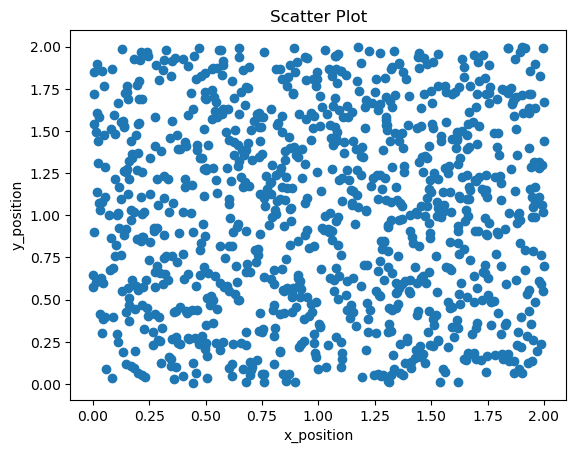

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Replace 'specific_column' and 'other_column' with the actual column names you want to visualize
plt.scatter(user_df['x_position'],user_df['y_position'])
plt.xlabel('x_position')
plt.ylabel('y_position')
plt.title('Scatter Plot')
plt.show()

# 사용자 이동 생성
- Gauss-Markov 모델 사용
- MEC는 N개가 격자형태로 존재한다고 가정 -> 4개라면 (0,0), (1,0), (0,1), (1,1)
- 사용자 위치 초기값은 랜덤 설정
- 위도, 경도를 고려했을 때 소수점 13자리까지 표현되는 것을 고려.

In [25]:
user_df = user_df.drop(['x_position', 'y_position'], axis=1)

In [26]:
import random
import math
import numpy as np

num_steps = 1
number_of_mecs = 9


def gauss_markov_model(initial_positions, num_steps, number_of_mecs):
    random.seed(42)
    #np.random.seed(42)

    new_positions = []  # List to store the new positions

    for initial_position in initial_positions:
        current_position = initial_position

        for _ in range(num_steps):
            direction = random.uniform(0, 2 * 3.14159)  # Random direction in radians
            speed = random.uniform(0,max_speed)  # Random speed based on max_speed

            # Calculate new position based on current position, speed, and direction
            new_x = current_position[0] + speed * math.cos(direction)
            new_y = current_position[1] + speed * math.sin(direction)

            if new_x < 0: # 왼쪽으로 나가 버린 경우
                new_x = (int(number_of_mecs**(1/2))-1) - abs(new_x) # 오른쪽으로 다시 들어옴 
            elif new_x > (int(number_of_mecs**(1/2))-1): # 오른쪽으로 나가버린 경우
                new_x = new_x - (int(number_of_mecs**(1/2))-1)
            
            if new_y < 0: # 아래쪽으로 나가 버린 경우
                new_y = (int(number_of_mecs**(1/2))-1) - abs(new_y)
            elif new_y > (int(number_of_mecs**(1/2))-1): # 위쪽으로 나가버리는 경우
                new_y = new_y - (int(number_of_mecs**(1/2))-1)

            # Ensure the new position is within [0, sqrt(number_of_mecs)] range
            new_x = round(max(0, min(new_x, int(number_of_mecs**(1/2))-1)), 13)
            new_y = round(max(0, min(new_y, int(number_of_mecs**(1/2))-1)), 13)

            new_position = (new_x, new_y)
            new_positions.append(new_position)

            current_position = new_position

    return new_positions

In [27]:
new_positions = gauss_markov_model(user_df['positions'], num_steps, number_of_mecs)
new_positions

[(1.2756512324004, 0.0461788061133),
 (0.5430670083251, 0.4905127280051),
 (1.4614513359064, 1.2185477878058),
 (1.7979071099037, 0.1629787289865),
 (0.8385870591771, 0.0624021668046),
 (0.4570638193385, 1.1098256552818),
 (0.0922880003339, 0.4042750752722),
 (1.2356428527737, 1.0017563370056),
 (0.4626442727574, 1.2943576705962),
 (1.6193350511053, 0.0117873340444),
 (1.6596108155511, 1.2651506012231),
 (0.6637977579634, 0.3371879072699),
 (1.9793268765085, 0.6553080811508),
 (0.2016425203218, 0.2040776058115),
 (1.7644139192637, 1.1086616365383),
 (1.6655253158805, 1.3228185862433),
 (0.8828533143467, 1.9023120125129),
 (0.6772842457513, 1.1803989310124),
 (1.7179977757382, 1.1284144842368),
 (1.7979669666312, 1.0665269384142),
 (1.4065630530681, 0.0828547142522),
 (0.4638082291017, 0.6360963315814),
 (0.2004124867369, 0.4879579827005),
 (0.2467734473869, 0.5889072936043),
 (1.2233509573287, 0.6747245814959),
 (0.7116437954363, 0.4495262942),
 (0.5140102983097, 0.0595752642568),
 (1.

# Make Heatmap

In [28]:
# time_t1, time_interval 모두 timestamp 형태

import pandas as pd
import numpy as np

def make_request_list(dataframe, now, time_interval):
    now_datetime = pd.to_datetime(now, unit='s')
    end_datetime = now_datetime + pd.Timedelta(hours=time_interval)
    request_df = dataframe[(pd.to_datetime(dataframe['timestamp'], unit='s') >= now_datetime) & (pd.to_datetime(dataframe['timestamp'], unit='s') <= end_datetime)]
    end_time = int(end_datetime.timestamp())
    return request_df, end_time

now = start_timestamp  # 현재 시간(timestamp)
time_interval = 6  # 시간 간격(hours 단위)
ex_rating_df = month_rating_df.copy()

In [29]:
# Function to map request_movie_ids based on nearest_mec
def map_movie_ids_to_service_ids(row):
    nearest_mec = row['nearest_mec']
    request_movie_ids = row['request_movie_ids']

    if 0 <= nearest_mec < len(service_id_per_mec):
        service_dict = service_id_per_mec[nearest_mec]

        request_service_ids = []
        for request_movie_id in request_movie_ids:
            try: # Y=1 인 경우 하위 80프로 movieId는 할당되는 service가 없음 -> except문 처리
                request_service_id = service_dict[request_movie_id]
                request_service_ids.append(request_service_id)
            except:
                continue

    return request_service_ids

In [30]:
import os

save_path = "./heatmap"+'_case5_'+str(Y)+"_speed"+str(max_speed)

try:
    os.mkdir(save_path)
except:
    print('[Errno 17] File exists')

[Errno 17] File exists


In [31]:
import os

csv_path = "./case5_user_mobility_speed"+str(max_speed)

try:
    os.mkdir(csv_path)
except:
    print('[Errno 17] File exists')

[Errno 17] File exists


In [32]:
import os

num=0

for filename in os.listdir(save_path):
    if filename.lower().endswith('.png'):
        num+=1
num

1216

In [33]:
import pandas as pd
import random
from PIL import Image
from scipy.spatial.distance import cdist

random.seed(42)

end_time = now
now_user_id = 0

# Determine the maximum values for creating the matrix
max_nearest_mec = number_of_mecs
max_request_service_id = number_of_service_Ids

while end_time < end_timestamp:
    print('save image index:',num)

    request_df, end_time = make_request_list(ex_rating_df, end_time, time_interval)

    # Create a dictionary to map user IDs to their corresponding service_ids
    request_df['userId'] = [(now_user_id+i)%number_of_sample_users for i in range(len(request_df))]
    try:
        now_user_id = int(request_df.iloc[-1]['userId'])+1 # user+1반영
    except:
        print('no request time')
    user_movie_mapping = request_df.groupby('userId')['remapped_movieId'].apply(list).to_dict()

    #print(service_id_per_mec[0])
    user_df['request_movie_ids'] = user_df['userId'].map(user_movie_mapping)
    user_df['request_movie_ids'] = user_df['request_movie_ids'].fillna("").apply(list)


    # Apply the mapping function to the DataFrame
    user_df['request_service_ids'] = user_df.apply(map_movie_ids_to_service_ids, axis=1)

    user_df['positions'] = gauss_markov_model(user_df['positions'], num_steps, number_of_mecs)

    # Calculate distances and find nearest mec for each position
    user_df['nearest_mec'] = user_df['positions'].apply(
        lambda pos: np.argmin(cdist([pos], mecs))
    )
    user_df.to_csv(csv_path+'/timeslot_'+str(num)+'.csv', index=False)

    # Initialize the matrix with zeros
    matrix = np.zeros((max_nearest_mec, max_request_service_id), dtype=int)

    # Populate the matrix based on the DataFrame
    for _, row in user_df.iterrows():
        nearest_mec = row['nearest_mec']
        request_service_ids = row['request_service_ids']

        for service_id in request_service_ids:
            matrix[nearest_mec][service_id] += 1

    normalized_matrix = matrix / matrix.max(axis=1, keepdims=True)

    # Create a PIL image from the array
    image = Image.fromarray((255 * normalized_matrix).astype(np.uint8), mode='L')

    file_name = '/train'+str(num)+'.png'
    image.save(save_path+file_name, compression_level=0)

    num+=1

save image index: 1216
save image index: 1217
save image index: 1218
save image index: 1219
save image index: 1220
save image index: 1221
save image index: 1222
save image index: 1223
save image index: 1224
save image index: 1225
save image index: 1226
save image index: 1227
save image index: 1228
save image index: 1229
save image index: 1230
save image index: 1231
save image index: 1232
save image index: 1233
save image index: 1234
save image index: 1235
save image index: 1236
save image index: 1237
save image index: 1238
save image index: 1239
save image index: 1240
save image index: 1241
save image index: 1242
save image index: 1243
save image index: 1244
save image index: 1245
save image index: 1246
save image index: 1247
save image index: 1248
save image index: 1249
save image index: 1250
save image index: 1251
save image index: 1252
save image index: 1253
save image index: 1254
save image index: 1255
save image index: 1256
save image index: 1257
save image index: 1258
save image 

# 생성 확인

In [34]:
normalized_matrix

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        1.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.33333333, 0.        , 0.        , 1.        , 0. 

In [35]:
from IPython.display import display
from PIL import Image

# Set up the path to the saved image
file_name = '/train'+str(num-1)+'.png'


# Load the image
image = Image.open(save_path+file_name)

# Display the image
display(image)

In [36]:
image_array = np.array(image)
image_array.shape

(9, 64)

In [37]:
image_array / 255

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        1.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.33333333, 0.        , 0.        , 1.        , 0. 

In [38]:
row_sums = np.sum(normalized_matrix, axis=1)
row_sums

array([1.        , 2.        , 2.        , 1.5       , 3.66666667,
       2.        , 1.        , 1.5       , 2.        ])

In [39]:
row_sums = np.sum(image_array / 255, axis=1)
row_sums

array([1.        , 2.        , 2.        , 1.49803922, 3.66666667,
       2.        , 1.        , 1.49803922, 1.99607843])